In [1]:
import os
import pandas as pd
from math import ceil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import datetime
import logging
#pd.show_versions(as_json=False)

logging.basicConfig(level=logging.INFO)

threshold = 1000

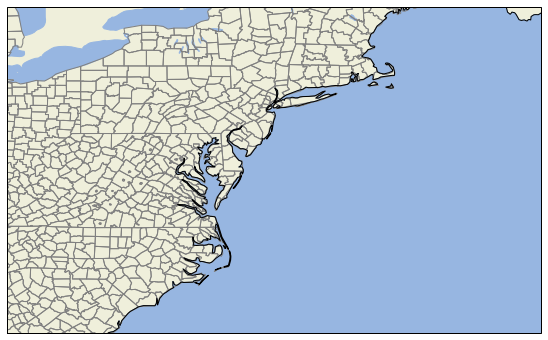

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt


#reader = shpreader.Reader('../other3p/county/countyl010g.shp')
reader = shpreader.Reader('../other3p/uscounties/uscounties.shp')

county_records = list(reader.records())
counties = [r.geometry for r in county_records]

COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(COUNTIES, facecolor='none', edgecolor='gray')

ax.coastlines('50m')

ax.set_extent([-83, -65, 33, 44])
plt.show()

In [3]:
for c in county_records[80:85]:
    logging.info(c.attributes)

INFO:root:{'NAME': 'Dawson', 'STATE_NAME': 'Montana', 'STATE_FIPS': '30', 'CNTY_FIPS': '021', 'FIPS': '30021'}
INFO:root:{'NAME': 'King', 'STATE_NAME': 'Washington', 'STATE_FIPS': '53', 'CNTY_FIPS': '033', 'FIPS': '53033'}
INFO:root:{'NAME': 'Cascade', 'STATE_NAME': 'Montana', 'STATE_FIPS': '30', 'CNTY_FIPS': '013', 'FIPS': '30013'}
INFO:root:{'NAME': 'Griggs', 'STATE_NAME': 'North Dakota', 'STATE_FIPS': '38', 'CNTY_FIPS': '039', 'FIPS': '38039'}
INFO:root:{'NAME': 'Steele', 'STATE_NAME': 'North Dakota', 'STATE_FIPS': '38', 'CNTY_FIPS': '091', 'FIPS': '38091'}


In [4]:
# Load Data
def load_raw(fn):
    datapath = os.path.join('../csse_covid_19_data/csse_covid_19_time_series/', fn)

    #datapath = '../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
    
    raw = pd.read_csv(datapath)
    #del raw['Lat']
    #del raw['Long']
    #raw= raw.replace('Mainland China','China')
    raw = raw[raw.iso2=='US']
    raw = raw[pd.notnull(raw.UID) & ~(raw.Lat==0.0)]
    # fix HI/AK later
    raw = raw[~(raw.Province_State=='Alaska') & ~(raw.Province_State=='Hawaii')]
    return raw

raw = load_raw('time_series_covid19_confirmed_us.csv')
#raw_deaths = load_raw('time_series_covid19_deaths_global.csv')

raw


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2010,2021,2023,2030,2048,2059,2074,2082,2103,2126
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,6405,6443,6475,6615,6637,6658,6694,6712,6743,6768
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,988,996,997,1012,1031,1033,1033,1042,1045,1055
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,791,801,811,825,828,840,843,850,856,861
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,1848,1873,1893,1911,1925,1932,1942,1972,1988,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,84056037,US,USA,840,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,...,428,436,443,451,456,462,476,488,505,522
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,716,715,727,740,743,747,756,761,772,779
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,404,407,410,425,428,431,442,451,462,469
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,139,142,143,144,145,145,146,151,153,153


In [5]:
raw[raw['FIPS']==53033]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20
3159,84053033,US,USA,840,53033.0,King,Washington,US,47.491379,-121.834613,...,25329,25540,25712,25896,26164,26329,26519,26599,26789,27021


INFO:root:maxes: 3116 counties: 3116
INFO:root:2/28/20
INFO:root:1.0
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>
INFO:root:2/28/20
INFO:root:1.0
INFO:root:2/28/20
INFO:root:1.0
INFO:root:2/29/20
INFO:root:1.0
INFO:root:3/1/20
INFO:root:1.0
INFO:root:3/2/20
INFO:root:1.0
INFO:root:3/3/20
INFO:root:1.0
INFO:root:3/4/20
INFO:root:1.0
INFO:root:3/5/20
INFO:root:1.0
INFO:root:3/6/20
INFO:root:1.0
INFO:root:3/7/20
INFO:root:1.0
INFO:root:3/8/20
INFO:root:1.0
INFO:root:3/9/20
INFO:root:1.0
INFO:root:3/10/20
INFO:root:1.0
INFO:root:3/11/20
INFO:root:1.0
INFO:root:3/12/20
INFO:root:1.0
INFO:root:3/13/20
INFO:root:1.0
INFO:root:3/14/20
INFO:root:1.0
INFO:root:3/15/20
INFO:root:1.0
INFO:root:3/16/20
INFO:root:1.0
INFO:root:3/17/20
INFO:root:1.0
INFO:root:3/18/20
INFO:root:1.0
INFO:root:3/19/20
INFO:root:1.0
INFO:root:3/20/20
INFO:root:1.0
INFO:root:3/21/20
INFO:root:1.0
INFO:root:3/22/20
INFO:root:1.0
INFO:root:3/23/20
INFO:root:1.0
INFO:root:3/24/20

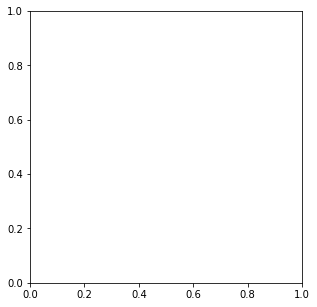

INFO:root:2/28/20
INFO:root:1.0


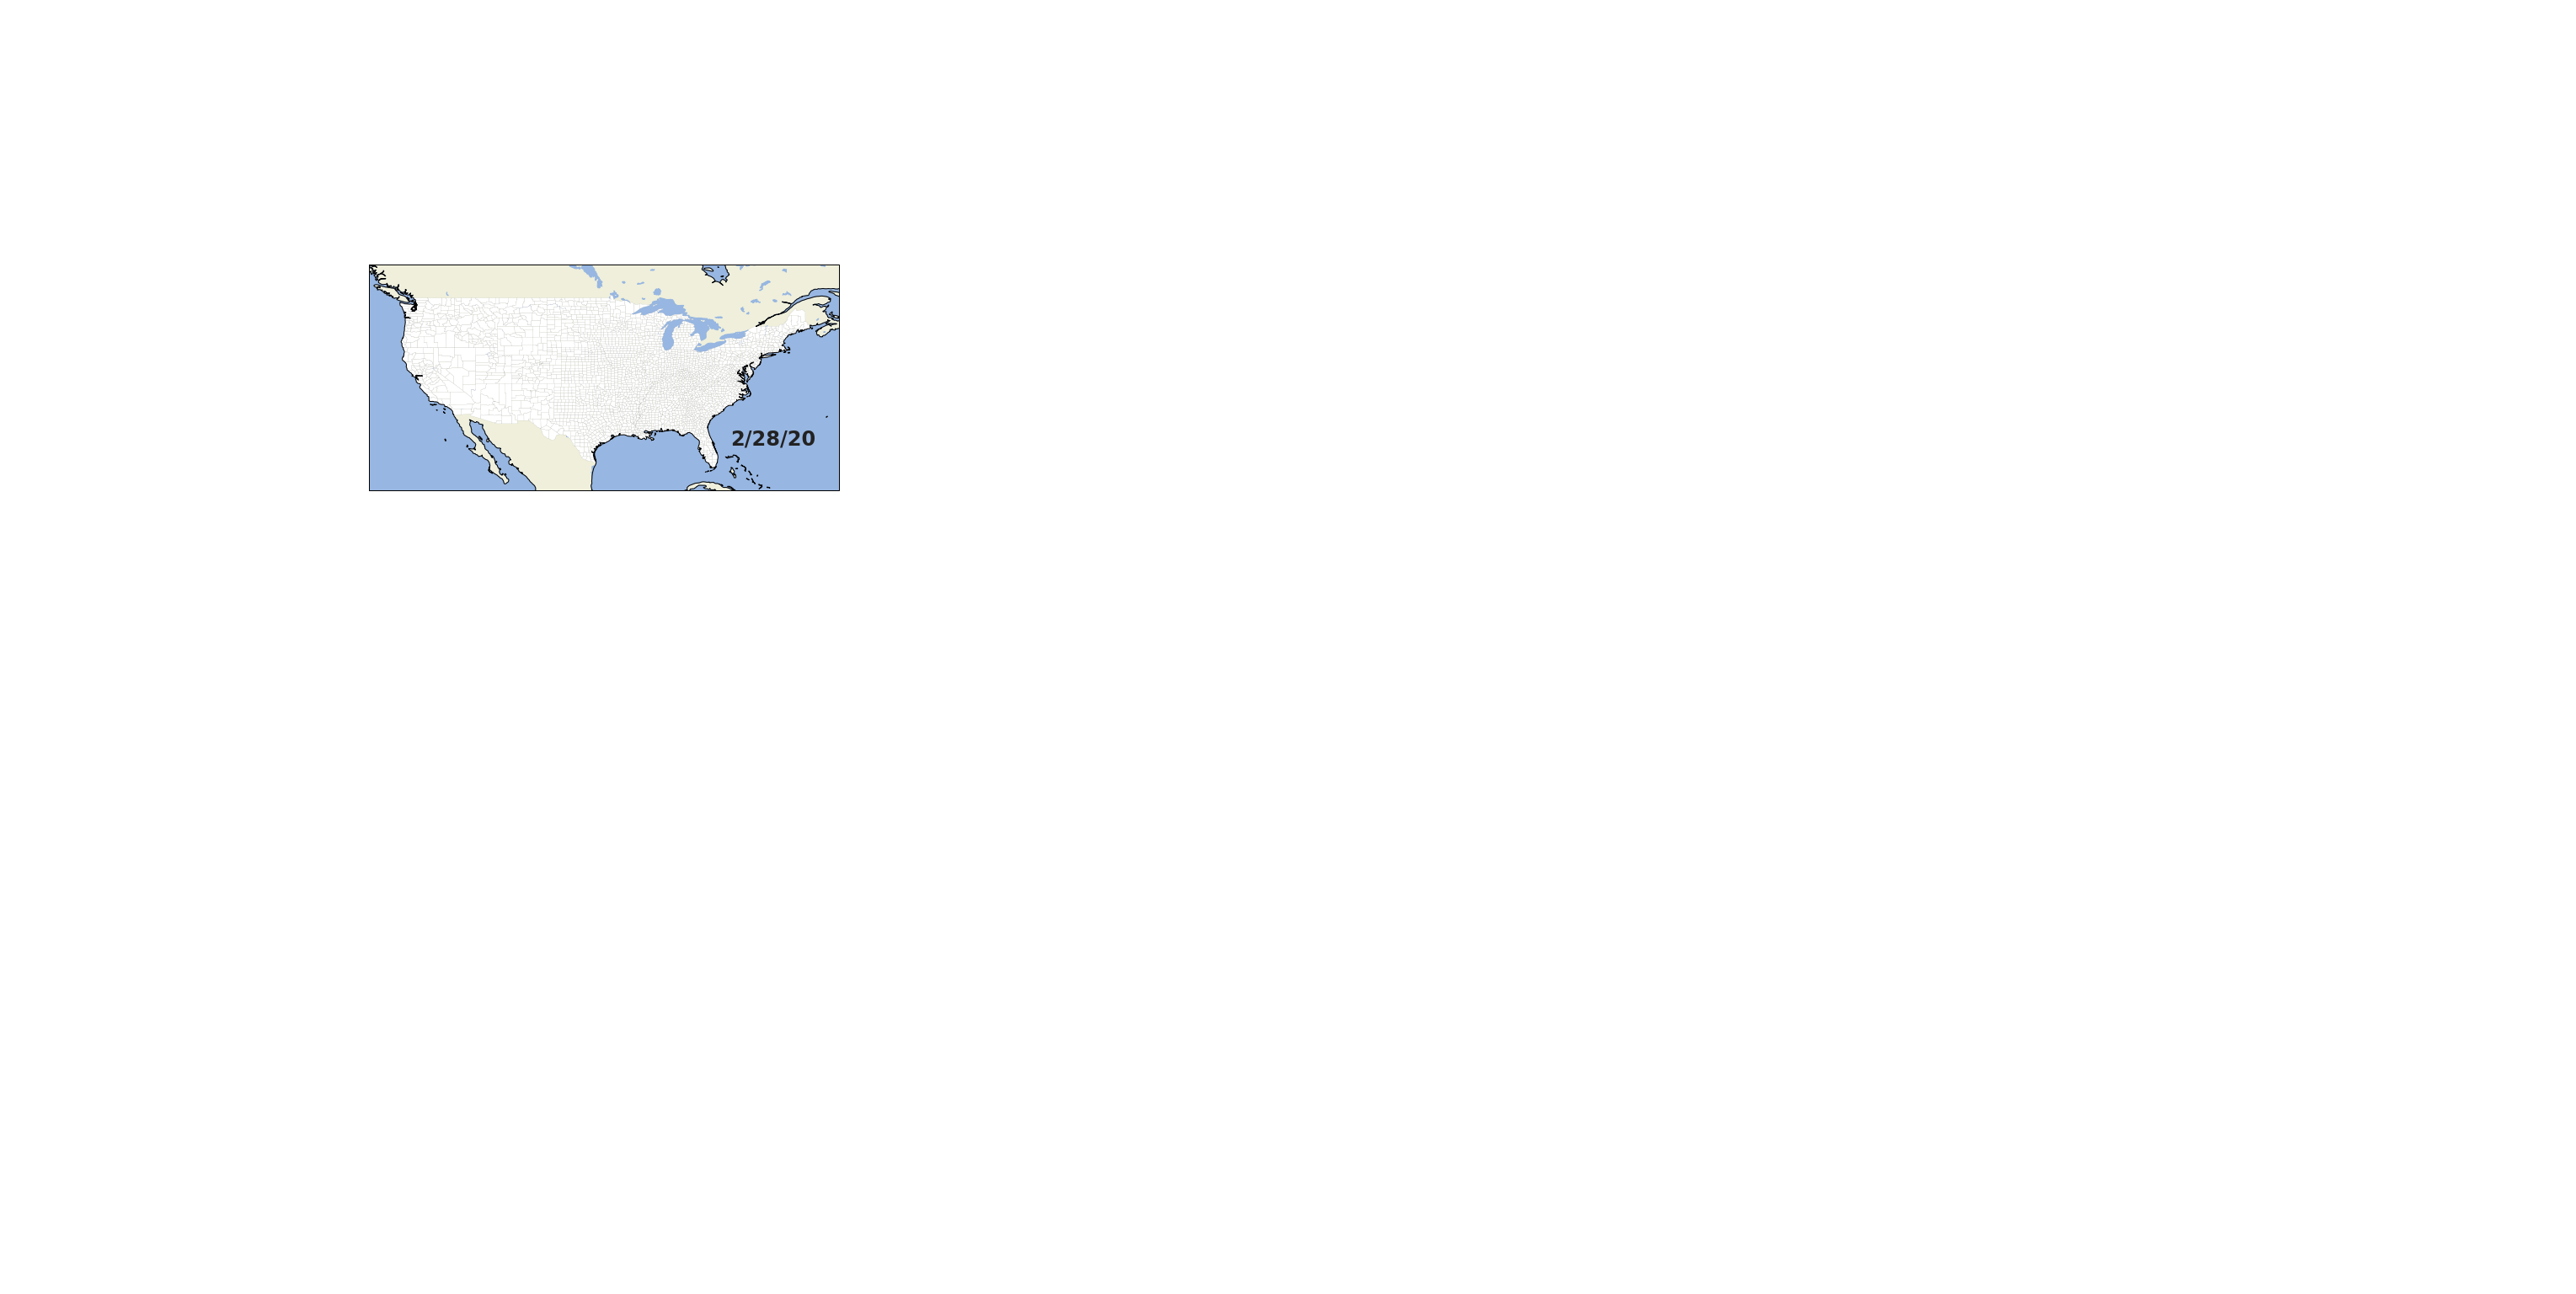

In [17]:
#%%capture
%matplotlib inline
from math import log
plt.rcParams["figure.figsize"] = [10, 5]
x=raw['Long_']
y=raw['Lat']
#c=raw['4/19/20'].apply(lambda x: log(x) if x>0 else 0)
weeks = 36
window = 7
dates=raw.columns[-weeks*7:]
#print(dates)
new = [(raw[dates[i]]-raw[dates[i-window]]).apply(lambda x: x if x>0 else 0) for i in range(window,len(dates))]
maxes = [max(1,max(m)) for m in zip(*new)]
new = [n.divide(maxes) for n in new]
logging.info('maxes: {} counties: {}'.format(len(maxes),len(new[0])))
#maxval=[c.max() for c in new]
#print(c.min(),c.max())
plt.gca().set_aspect('equal', adjustable='box')
fig, ax = plt.subplots()

#plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([-83, -65, 33, 44])

fips = raw['FIPS'].fillna(-1).apply(lambda x: int(x))

cty_fips = set([int(r.attributes['FIPS']) for r in county_records])
raw_fips = set(fips)

logging.debug(cty_fips.difference(raw_fips))
logging.debug(raw_fips.difference(cty_fips))

logging.debug(list(sorted(cty_fips))[:10])
logging.debug(list(sorted(raw_fips))[:10])

#plt.show()
lookup_0 = dict(zip(list(fips),list(raw['Admin2'])))
test_mapping = zip([r.attributes['NAME'] for r in county_records], [lookup_0[int(r.attributes['FIPS'])] if int(r.attributes['FIPS']) in lookup_0 else 'missing' for r in county_records])
#for (r,l) in test_mapping:
#    print(r,l)

#cmap=plt.cm.autumn_r
#cmap=plt.cm.bwr
cmap=plt.cm.hot_r
#norm=plt.Normalize(min(mapping),max(mapping))
    
from math import exp

def plot_map(date_tuple):
    c,dt = date_tuple
    logging.info(dt)
    maxval = 1.0 #max(c)
    logging.info(maxval)
    norm=plt.Normalize(0,maxval)
    # todo: this could be done outside the call.
    #print(len(fips),len(c))
    lookup = dict(zip(list(fips),c))
    #print(lookup)
    mapping = [lookup[int(r.attributes['FIPS'])] if int(r.attributes['FIPS']) in lookup else 0.0 for r in county_records]    
    mapping_ext = []
    for (m,c,r) in zip(mapping,counties,county_records):
        mapping_ext+=[m]*len(c.geoms)
        #if m==maxval:
        #    logging.info(r)
    
    #print(mapping)
    #print(min(mapping),max(mapping))
    logging.debug(len(mapping),len(counties))
    #print(dt)
    ax.clear()
    ax.add_feature(cfeature.LAND.with_scale('50m'))
    ax.add_feature(cfeature.OCEAN.with_scale('50m'))
    ax.add_feature(cfeature.LAKES.with_scale('50m'))
    #print(max(mapping),cmap(norm(max(mapping))))
    #add_feature(COUNTIES
    ax.add_geometries(counties, ccrs.PlateCarree(), facecolor=list(cmap(norm(mapping_ext))), edgecolor='gray', linewidth=0.1)
    ax.coastlines('50m')

    #ax.scatter(x,y, c=c, alpha=0.5, cmap='autumn_r')
    ax.set_yticks([])
    ax.set_xticks([])
    #ax.set_extent([-76,-72,38,42]) # Manhattan
    #ax.set_extent([-83, -65, 33, 44]) Eastern Seaboard
    #ax.set_extent([-124,-120,46,49]) # Western WA
    ax.set_extent([-129,-63,22,49]) # US
    plt.box(False)
    ax.text(0.95, 0.2, dt, transform=ax.transAxes, color='#222222', size=24, ha='right', weight=800)

frames = list(zip(new,dates[window:]))
plot_map(frames[0])

animate = True
if animate:
    animator = animation.FuncAnimation(fig, plot_map, frames=frames, repeat=False)
    #HTML(animator.to_jshtml()) 

    maxDate=raw.columns[-1].replace('/','-')
    #animator.save('data/animation-fill-{}.gif'.format(maxDate))
    animator.save('data/animation-fill-latest.gif')


In [7]:
fips

0        1001
1        1003
2        1005
3        1007
4        1009
        ...  
3334    56037
3335    56039
3336    56041
3338    56043
3339    56045
Name: FIPS, Length: 3116, dtype: int64